In [4]:
# import
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [5]:
client = 1
round = 35

with open('protos/proto_round_'+str(round)+'.pkl', 'rb') as file:
    data_np = pickle.load(file).cpu()

with open('protos/labels_round_'+str(round)+'.pkl', 'rb') as file:
    labels_np = pickle.load(file).cpu()

# with open('protos-fedproto/client_'+str(client)+'_proto_round_'+str(round)+'.pkl', 'rb') as file:
#     data_np = pickle.load(file).cpu()

# with open('protos-fedproto/client_'+str(client)+'_labels_round_'+str(round)+'.pkl', 'rb') as file:
#     labels_np = pickle.load(file).cpu()

# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_np)

# Get unique labels
unique_labels = np.unique(labels_np)

# Define a color map (adjust if you have more than 10 labels)
colors = plt.cm.tab10.colors  # Tab10 colormap has 10 distinct colors

# Create a mapping from labels to colors
label_color_dict = {label: colors[i % len(colors)] for i, label in enumerate(unique_labels)}


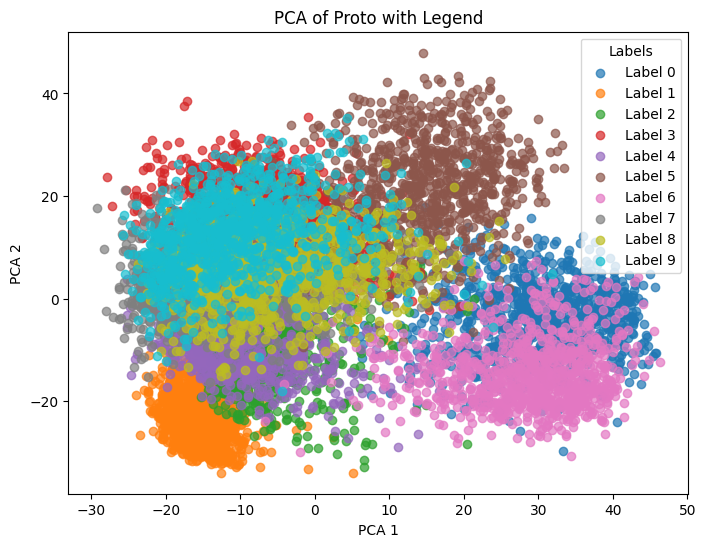

In [6]:
# Plot the data
plt.figure(figsize=(8, 6))
for label in unique_labels:
    indices = labels_np == label
    plt.scatter(
        data_pca[indices, 0],
        data_pca[indices, 1],
        color=label_color_dict[label],
        label=f'Label {label}',
        alpha=0.7
    )

plt.legend(title='Labels')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA of Proto with Legend')
plt.show()